In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# mpl.use('pgf')
# mpl.rcParams.update({
#     "pgf.texsystem": "pdflatex",  # Use pdflatex for rendering
#     'font.family': 'serif',       # Use serif font family
#     'text.usetex': True,          # Use LaTeX for text rendering
#     'pgf.rcfonts': False,         # Don't setup fonts from rc params
#     'pgf.preamble': r'\usepackage{amsmath,amsfonts,amssymb}\usepackage[T2A,T1]{fontenc}\usepackage[utf8]{inputenc}\usepackage[ukrainian]{babel}',  # Use Ukrainian Cyrillic font
#     'font.size': 10               # Set font size
# })

In [3]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

C:\Users\games\AppData\Local\Temp\ipykernel_49232\3912264495.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


[]

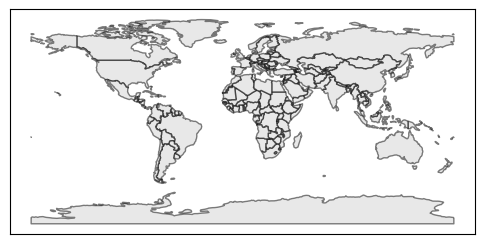

In [4]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot()

world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)

ax.set_xticks([])
ax.set_yticks([])

In [5]:
country_data = pd.read_csv('data/NCD_RisC_Lancet_2016_DM_crude_countries.csv')
country_data = country_data[country_data['Year'] == 2014]

In [6]:
world[world['name'] == 'Ukraine']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
112,44385155.0,Europe,Ukraine,UKR,153781,"POLYGON ((32.15944 52.06125, 32.41206 52.28869..."


In [7]:
countries = world['name'].unique()
countries

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [8]:
mean_world = country_data.groupby('Country/Region/World')['Crude diabetes prevalence'].mean()
mean_world

Country/Region/World
Afghanistan    0.084134
Albania        0.082539
Algeria        0.104837
Andorra        0.091193
Angola         0.056218
                 ...   
Venezuela      0.087728
Viet Nam       0.048873
Yemen          0.077063
Zambia         0.042306
Zimbabwe       0.046172
Name: Crude diabetes prevalence, Length: 195, dtype: float64

In [9]:
bins = [(2, 5), (5, 8), (8, 11), (11, 14), (14, 17)]

lower_bounds = [interval[0] for interval in bins]
upper_bounds = [interval[1] for interval in bins]

cut_data = pd.cut(mean_world * 100, bins=pd.IntervalIndex.from_tuples(bins), right=False)
bin_counts = cut_data.value_counts().sort_index()

<BarContainer object of 5 artists>

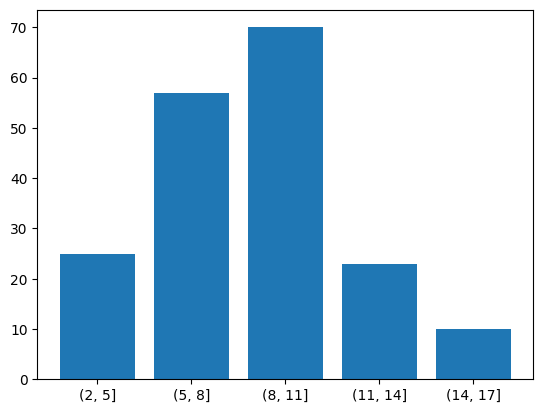

In [10]:
plt.bar(bin_counts.index.astype(str), bin_counts.values)

In [11]:
colors = sns.color_palette("Reds", len(bins))
colors

[(0.9935870818915802, 0.8323414071510957, 0.7624913494809689),
 (0.9882352941176471, 0.6261437908496732, 0.5084967320261438),
 (0.9835755478662053, 0.4127950788158401, 0.28835063437139563),
 (0.8901960784313725, 0.18562091503267975, 0.15294117647058825),
 (0.6943944636678201, 0.07003460207612457, 0.09231833910034601)]

In [12]:
for (bin_label, color) in list(zip(cut_data.cat.categories, colors)):
    print(bin_label, color)

(2, 5] (0.9935870818915802, 0.8323414071510957, 0.7624913494809689)
(5, 8] (0.9882352941176471, 0.6261437908496732, 0.5084967320261438)
(8, 11] (0.9835755478662053, 0.4127950788158401, 0.28835063437139563)
(11, 14] (0.8901960784313725, 0.18562091503267975, 0.15294117647058825)
(14, 17] (0.6943944636678201, 0.07003460207612457, 0.09231833910034601)


In [13]:
cut_data

Country/Region/World
Afghanistan    (8, 11]
Albania        (8, 11]
Algeria        (8, 11]
Andorra        (8, 11]
Angola          (5, 8]
                ...   
Venezuela      (8, 11]
Viet Nam        (2, 5]
Yemen           (5, 8]
Zambia          (2, 5]
Zimbabwe        (2, 5]
Name: Crude diabetes prevalence, Length: 195, dtype: category
Categories (5, interval[int64, right]): [(2, 5] < (5, 8] < (8, 11] < (11, 14] < (14, 17]]

In [14]:
category_colors = dict(zip(cut_data.cat.categories, colors))

category_colors = {category: color for category, color in zip(cut_data.cat.categories, colors)}
category_colors[np.nan] = 'grey'

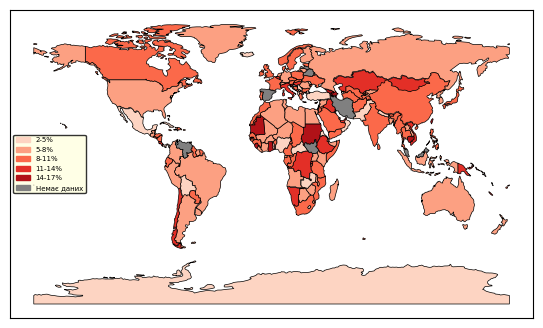

In [15]:
fig, ax = plt.subplots(figsize=(6.75, 4))
patches = []

for country, category in zip(countries, cut_data):
    color = category_colors[category]

    if not country == 'None':
        selected_country = world[world["name"] == country]
        selected_country.plot(ax=ax, color=color, alpha=1, edgecolor='k', linewidth=0.5)
    else:
        selected_country = world[world["name"] == country]
        selected_country.plot(ax=ax, color='w', alpha=1, edgecolor='w', linewidth=0.0)

for bin_label, color in zip(cut_data.cat.categories, colors):
    patch = mpatches.Patch(color=color, label=f"{bin_label.left}-{bin_label.right}%")
    patches.append(patch)

patches.append(mpatches.Patch(color='grey', label='Немає даних'))

ax.legend(handles=patches, loc="center left", fontsize=5)
legend = ax.get_legend()
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_facecolor('lightyellow')

ax.set_xticks([])
ax.set_yticks([])

ax.set_aspect('auto')

#plt.savefig("figures/world_map.png", dpi=200)
#plt.savefig("figures/world_map.pgf")

In [16]:
cut_data.cat.categories

IntervalIndex([(2, 5], (5, 8], (8, 11], (11, 14], (14, 17]], dtype='interval[int64, right]')

In [17]:
db_rate_world = pd.read_csv("data/NCD_RisC_Lancet_2016_DM_age_standardised_world.csv")
db_rate_countries = pd.read_csv("data/NCD_RisC_Lancet_2016_DM_crude_countries.csv")

In [18]:
db_rate_world[db_rate_world['Sex'] == 'Men'].head()

,Country/Region/World,ISO,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval
0,World,NaN,Men,1980,0.042908,0.024496,0.069721
1,World,NaN,Men,1981,0.043659,0.025654,0.069430
2,World,NaN,Men,1982,0.044468,0.026977,0.069323
3,World,NaN,Men,1983,0.045343,0.028151,0.069163
4,World,NaN,Men,1984,0.046285,0.029518,0.069173


<BarContainer object of 70 artists>

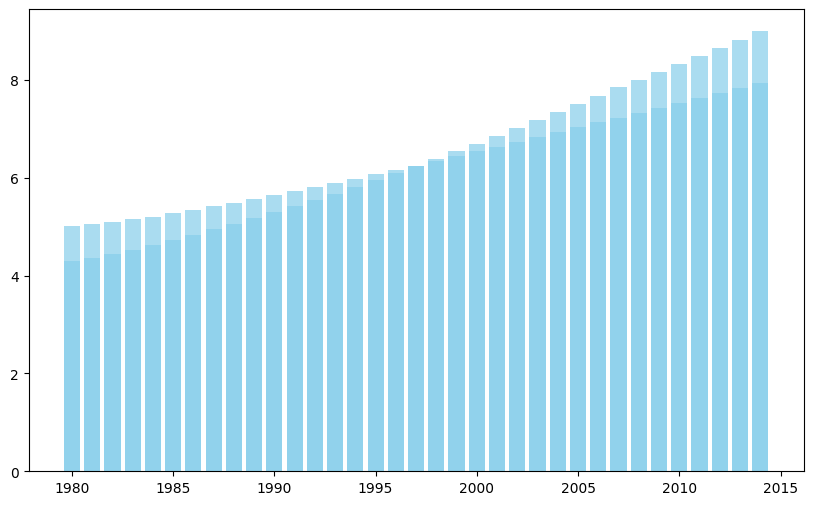

In [19]:
years = db_rate_world['Year']
prevalence = db_rate_world['Age-standardised diabetes prevalence']

plt.figure(figsize=(10, 6))
plt.bar(years, prevalence * 100, capsize=5, color='skyblue', alpha=0.7)

In [20]:
prevalence_world = db_rate_world[['Year', 
                                  'Sex', 
                                  'Age-standardised diabetes prevalence', 
                                  'Lower 95% uncertainty interval', 
                                  'Upper 95% uncertainty interval']]
prevalence_world = prevalence_world.rename(columns={
    'Age-standardised diabetes prevalence': 'prevalence',
    'Lower 95% uncertainty interval': "lw",
    'Upper 95% uncertainty interval': 'up'
})
prevalence_world

,Year,Sex,prevalence,lw,up
0,1980,Men,0.042908,0.024496,0.069721
1,1981,Men,0.043659,0.025654,0.069430
2,1982,Men,0.044468,0.026977,0.069323
3,1983,Men,0.045343,0.028151,0.069163
4,1984,Men,0.046285,0.029518,0.069173
...,...,...,...,...,...
65,2010,Women,0.075282,0.064805,0.087254
66,2011,Women,0.076280,0.064862,0.089451
67,2012,Women,0.077314,0.064802,0.091749
68,2013,Women,0.078378,0.064575,0.094422


In [21]:
prevalence_ukraine = db_rate_countries[db_rate_countries['Country/Region/World'] == 'Ukraine']
prevalence_ukraine = prevalence_ukraine[['Country/Region/World', 'Year', 'Sex', 'Crude diabetes prevalence']]
prevalence_ukraine = prevalence_ukraine.rename(columns={
    'Country/Region/World': 'Country',
    'Crude diabetes prevalence': 'prevalence'
})
prevalence_ukraine

,Country,Year,Sex,prevalence
6405,Ukraine,1980,Men,0.047458
6406,Ukraine,1981,Men,0.048172
6407,Ukraine,1982,Men,0.048961
6408,Ukraine,1983,Men,0.049830
6409,Ukraine,1984,Men,0.050797
...,...,...,...,...
13260,Ukraine,2010,Women,0.093888
13261,Ukraine,2011,Women,0.094578
13262,Ukraine,2012,Women,0.095281
13263,Ukraine,2013,Women,0.096098


Text(0, 0.5, 'Розповсюдженність %')

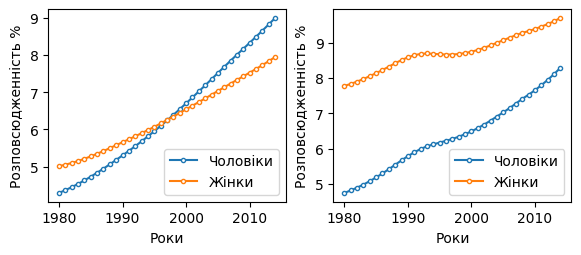

In [22]:
prevalence_world_men = prevalence_world[prevalence_world['Sex'] == 'Men']
prevalence_world_women = prevalence_world[prevalence_world['Sex'] == 'Women']

prevalence_ukraine_men = prevalence_ukraine[prevalence_ukraine['Sex'] == 'Men']
prevalence_ukraine_women = prevalence_ukraine[prevalence_ukraine['Sex'] == 'Women']

fig, axs = plt.subplots(1, 2, figsize=(6.75, 2.5))
axs[0].plot(prevalence_world_men['Year'], prevalence_world_men['prevalence'] * 100, 
         marker='o', markersize=3, label='Чоловіки', markerfacecolor='w')
axs[0].plot(prevalence_world_women['Year'], prevalence_world_women['prevalence'] * 100, 
         marker='o', markersize=3, label='Жінки', markerfacecolor='w')

axs[0].legend(loc='lower right')
axs[0].set_xlabel("Роки")
axs[0].set_ylabel("Розповсюдженність %")

axs[1].plot(prevalence_ukraine_men['Year'], prevalence_ukraine_men['prevalence'] * 100, 
         marker='o', markersize=3, label='Чоловіки', markerfacecolor='w')
axs[1].plot(prevalence_ukraine_women['Year'], prevalence_ukraine_women['prevalence'] * 100, 
         marker='o', markersize=3, label='Жінки', markerfacecolor='w')

axs[1].legend()
axs[1].set_xlabel("Роки")
axs[1].set_ylabel("Розповсюдженність %")